#TABULAR DATA PREPROCESSING


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()


Saving numerical_tabular.csv to numerical_tabular.csv


In [4]:
df = pd.read_csv('numerical_tabular.csv')
df.head()

,record_id,date,pharmacy_id,medicine_id,current_stock_level,avg_weekly_sales,reorder_quantity,lead_time_days,supplier_delay_frequency,price_change_rate,storage_capacity,pharmacy_location_code,medicine_category,target_stockout
0,1,2024-03-05,82,46,41,34,45,13,0.80,-0.00,359,9,Painkiller,0
1,2,2024-11-13,42,7,192,13,80,6,0.65,0.13,322,13,Cardiology,0
2,3,2024-11-02,68,26,79,17,62,1,0.55,0.08,242,4,Cardiology,0
3,4,2024-05-06,68,13,180,14,30,14,0.26,0.01,296,8,Antibiotic,0
4,5,2024-03-09,44,28,171,44,71,13,0.58,0.10,101,2,Vitamins,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   record_id                 1000 non-null   int64  
 1   date                      1000 non-null   object 
 2   pharmacy_id               1000 non-null   int64  
 3   medicine_id               1000 non-null   int64  
 4   current_stock_level       1000 non-null   int64  
 5   avg_weekly_sales          1000 non-null   int64  
 6   reorder_quantity          1000 non-null   int64  
 7   lead_time_days            1000 non-null   int64  
 8   supplier_delay_frequency  1000 non-null   float64
 9   price_change_rate         1000 non-null   float64
 10  storage_capacity          1000 non-null   int64  
 11  pharmacy_location_code    1000 non-null   int64  
 12  medicine_category         1000 non-null   object 
 13  target_stockout           1000 non-null   int64  
dtypes: float6

In [6]:
df.describe()

,record_id,pharmacy_id,medicine_id,current_stock_level,avg_weekly_sales,reorder_quantity,lead_time_days,supplier_delay_frequency,price_change_rate,storage_capacity,pharmacy_location_code,target_stockout
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.965000,25.395000,98.471000,31.549000,59.276000,7.863000,0.50672,0.047780,296.571000,10.592000,0.262000
std,288.819436,28.070906,14.019755,58.396449,16.264628,23.769535,4.290996,0.27857,0.087536,117.273894,5.730827,0.439943
min,1.000000,1.000000,1.000000,0.000000,5.000000,20.000000,1.000000,0.00000,-0.100000,100.000000,1.000000,0.000000
25%,250.750000,26.000000,13.000000,50.000000,17.000000,38.000000,4.000000,0.26000,-0.022500,196.000000,6.000000,0.000000
50%,500.500000,49.000000,25.000000,95.000000,32.000000,59.000000,8.000000,0.51000,0.040000,293.000000,11.000000,0.000000
75%,750.250000,74.000000,38.000000,149.000000,46.000000,80.000000,11.250000,0.74000,0.130000,398.250000,16.000000,1.000000
max,1000.000000,100.000000,50.000000,200.000000,60.000000,100.000000,15.000000,1.00000,0.200000,500.000000,20.000000,1.000000


In [7]:
df.isna().sum()

,0
record_id,0
date,0
pharmacy_id,0
medicine_id,0
current_stock_level,0
avg_weekly_sales,0
reorder_quantity,0
lead_time_days,0
supplier_delay_frequency,0
price_change_rate,0


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

In [10]:
df = df.drop(columns=['record_id', 'date'])

#ENCODING CATEGORICAL DATA
Encoding = converting text categories into numbers, because ML models cannot understand text.

In [11]:
df = pd.get_dummies(df, columns=['medicine_category'], drop_first=True)

#DEFINE FEATURES (X) AND TARGET (y)
y = what we want to predict (stock-out or not)

X = all other columns used as inputs for prediction

In [12]:
y = df['target_stockout']
X = df.drop(columns=['target_stockout'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['pharmacy_id', 'medicine_id', 'current_stock_level', 'avg_weekly_sales',
       'reorder_quantity', 'lead_time_days', 'supplier_delay_frequency',
       'price_change_rate', 'storage_capacity', 'pharmacy_location_code'],
      dtype='object')

#SCALE NUMERICAL FEATURES


In [15]:
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

#FINAL DATA INTEGRITY CHECKS


#CHECK FOR OUTLIERS

<Axes: >

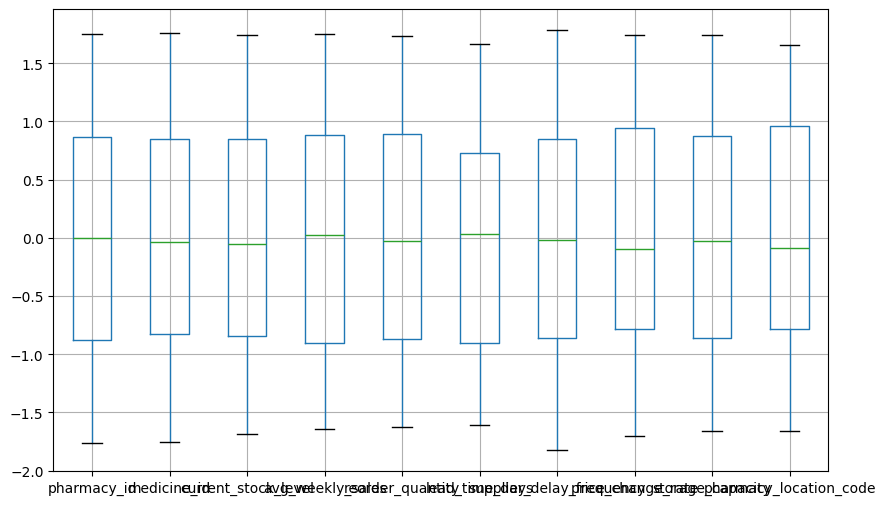

In [16]:
X_train[numeric_cols].boxplot(figsize=(10,6))

#CHECK DISTRIBUTIONS


array([[<Axes: title={'center': 'pharmacy_id'}>,
        <Axes: title={'center': 'medicine_id'}>,
        <Axes: title={'center': 'current_stock_level'}>],
       [<Axes: title={'center': 'avg_weekly_sales'}>,
        <Axes: title={'center': 'reorder_quantity'}>,
        <Axes: title={'center': 'lead_time_days'}>],
       [<Axes: title={'center': 'supplier_delay_frequency'}>,
        <Axes: title={'center': 'price_change_rate'}>,
        <Axes: title={'center': 'storage_capacity'}>],
       [<Axes: title={'center': 'pharmacy_location_code'}>, <Axes: >,
        <Axes: >]], dtype=object)

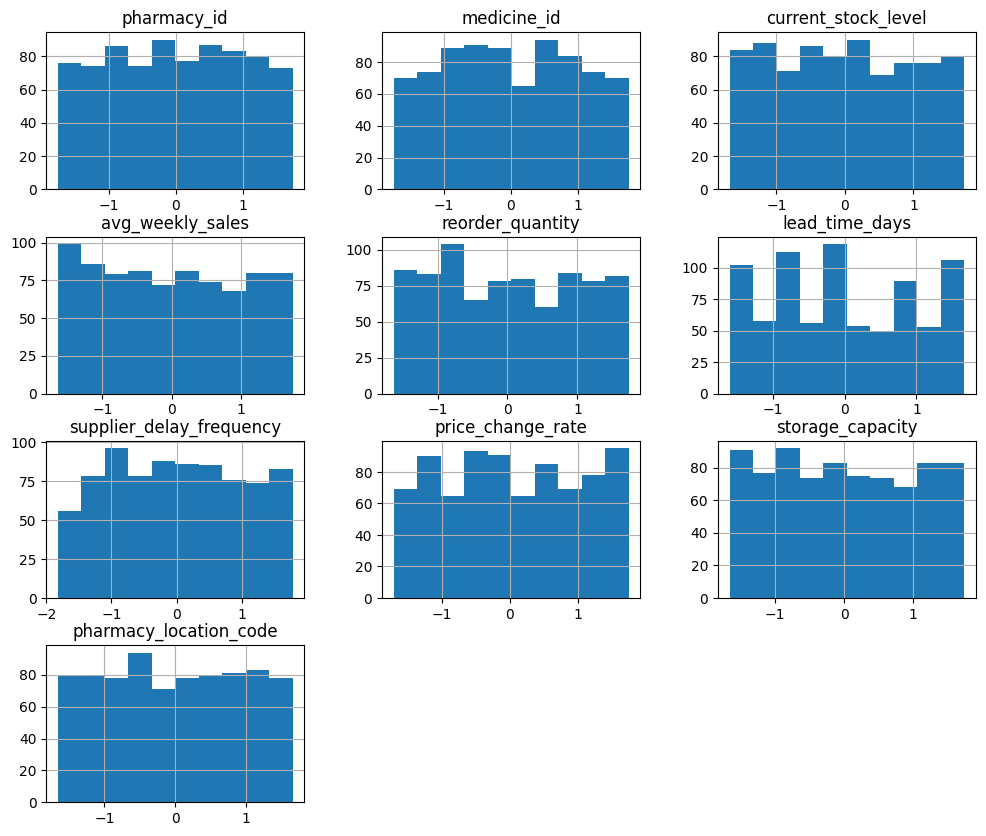

In [17]:
X_train[numeric_cols].hist(figsize=(12,10))

#CHECK CORRELATION

<Axes: >

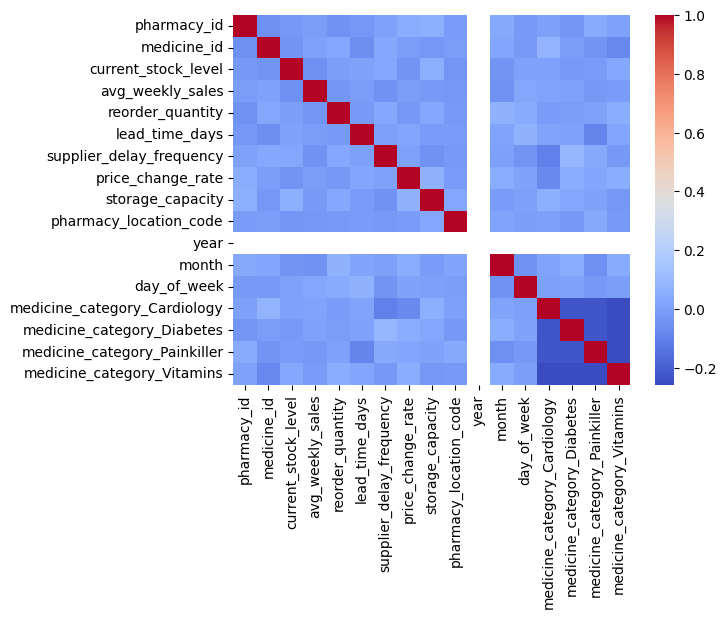

In [18]:
import seaborn as sns
sns.heatmap(X_train.corr(), annot=False, cmap='coolwarm')

In [19]:
df.to_csv("tabular_preprocessed.csv", index=False)

In [20]:
from google.colab import files
files.download("tabular_preprocessed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#MODELING SECTION
Machine Learning Model — Random Forest Classifier (Tabular Data)
In this section, we build and evaluate a Random Forest model to predict whether a pharmacy will experience a medicine stock-out.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [13]:
from google.colab import files
uploaded = files.upload()


Saving Preprocessed_tabular.csv to Preprocessed_tabular (1).csv


In [14]:
df = pd.read_csv('Preprocessed_tabular.csv')
df.head()

,pharmacy_id,medicine_id,current_stock_level,avg_weekly_sales,reorder_quantity,lead_time_days,supplier_delay_frequency,price_change_rate,storage_capacity,pharmacy_location_code,target_stockout,year,month,day_of_week,medicine_category_Cardiology,medicine_category_Diabetes,medicine_category_Painkiller,medicine_category_Vitamins
0,82,46,41,34,45,13,0.80,-0.00,359,9,0,2024,3,1,False,False,True,False
1,42,7,192,13,80,6,0.65,0.13,322,13,0,2024,11,2,True,False,False,False
2,68,26,79,17,62,1,0.55,0.08,242,4,0,2024,11,5,True,False,False,False
3,68,13,180,14,30,14,0.26,0.01,296,8,0,2024,5,0,False,False,False,False
4,44,28,171,44,71,13,0.58,0.10,101,2,1,2024,3,5,False,False,False,True


In [15]:
X = df.drop("target_stockout", axis=1) # → features the model uses as inputs
y = df["target_stockout"] # → target the model tries to predict

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 17)
y shape: (1000,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 17)
X_test shape: (200, 17)
y_train shape: (800,)
y_test shape: (200,)


In [17]:
model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [19]:
y_pred = model.predict(X_test)

#EVALUATE MODEL PERFORMANCE

We compute three key evaluation tools:

 1. Overall Correctness (Accuracy):
    - Measures how often the model is correct.

 2. Correct Stock-Out Alerts (Precision):
    - Out of all predictions where the model said "stock-out = 1",
      how many were actually TRUE stock-outs?
    - High precision = fewer false alarms.

 3. Confusion Matrix:
    - Shows EXACTLY how many stock-out cases were:
         - correctly predicted (TP)
         - incorrectly predicted (FP)
         - missed (FN)
         - correctly ignored (TN)
    - This is extremely important for medical/supply-chain decisions.


In [24]:
# 1. Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 3. Print metrics clearly
print("Accuracy (%):", accuracy * 100)
print("Precision Score (%):", precision * 100)
print("\nConfusion Matrix:")
print(cm)

Accuracy (%): 100.0
Precision Score (%): 100.0

Confusion Matrix:
[[148   0]
 [  0  52]]


#EVALUATE MODEL PERFORMANCE (TRAINING DATA)

In [26]:
train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training Accuracy (%):", train_acc * 100)
print("Test Accuracy (%):", accuracy * 100)

Training Accuracy (%): 100.0
Test Accuracy (%): 100.0


In [27]:
import joblib
joblib.dump(model, "tabular_model.pkl")

['tabular_model.pkl']